# Análisis de Series Temporales

El **análisis de series temporales** es una rama de la estadística y ciencia de datos que se enfoca en estudiar datos que han sido recolectados a lo largo del tiempo, con el objetivo de entender su comportamiento, identificar patrones y hacer predicciones futuras.


## ¿Qué es una serie temporal?

Una **serie temporal** es una secuencia de observaciones registradas en puntos de tiempo específicos, en intervalos regulares o irregulares (por ejemplo, datos horarios, diarios, mensuales, etc.).

Ejemplos comunes:
- Temperatura diaria
- Precipitación horaria
- Demanda de energía mensual
- Cotizaciones bursátiles minuto a minuto


## Objetivos principales del análisis temporal

- **Visualización** de tendencias, estacionalidad y fluctuaciones.
- **Detección de anomalías** o valores atípicos (outliers).
- **Modelado** para comprender la estructura temporal subyacente.
- **Predicción** de valores futuros (forecasting).
- **Descomposición** en componentes: tendencia, estacionalidad, y ruido.


## Componentes típicos de una serie temporal

1. **Tendencia (Trend)**  
   Comportamiento a largo plazo de la serie (creciente, decreciente, constante).

2. **Estacionalidad (Seasonality)**  
   Patrones repetitivos y predecibles en intervalos regulares (diarios, mensuales, anuales).

3. **Ciclo (Cycle)**  
   Fluctuaciones que no son estacionales y ocurren en intervalos más largos, generalmente ligadas a factores económicos o climáticos.

4. **Ruido (Noise)**  
   Variabilidad aleatoria e impredecible.


## Herramientas y técnicas comunes

- **Visualización**: líneas de tiempo, boxplots por hora/día/mes, diagramas de autocorrelación.
- **Transformaciones**: suavizado (moving average), diferencias (differencing), escalado.
- **Modelos estadísticos**: ARIMA, SARIMA, ETS.
- **Modelos de machine learning**: Random Forest, XGBoost, Redes Neuronales (RNN, LSTM).
- **Control de calidad**: detección y corrección de outliers, tratamiento de datos faltantes.


## Aplicaciones

- Meteorología y climatología
- Finanzas y economía
- Ingeniería de sistemas y redes
- Energía y consumo
- Ciencias ambientales y geofísica


> El análisis de series temporales no solo permite entender el pasado, sino anticipar el futuro, lo que lo convierte en una herramienta clave en la toma de decisiones basada en datos.


## Importar libreria

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Leer datos

In [26]:
filename = '../data/T2_G_QC.txt'
AWS_G = pd.read_csv(filename)
AWS_G.fecha_hora = pd.to_datetime(AWS_G.fecha_hora)
filename = '../data/T2_M_QC.txt'
AWS_M = pd.read_csv(filename)
AWS_M.fecha_hora = pd.to_datetime(AWS_M.fecha_hora)
AWS_M

,fecha_hora,Ta_Avg
0,2016-06-01 00:00:00,1.113636
1,2016-06-01 01:00:00,0.589906
2,2016-06-01 02:00:00,0.103807
3,2016-06-01 03:00:00,0.156244
4,2016-06-01 04:00:00,0.214754
...,...,...
14434,2018-01-23 10:00:00,1.833746
14435,2018-01-23 11:00:00,2.589166
14436,2018-01-23 12:00:00,3.048399
14437,2018-01-23 13:00:00,3.979526


## Juntar los dos datos

In [27]:
AWS_G_M = pd.merge(AWS_G, AWS_M, on='fecha_hora', how='left', suffixes=('_G', '_M'))[['fecha_hora', 'Ta_Avg_G', 'Ta_Avg_M']]

### Explicación de `pd.merge()` en Pandas

- **`pd.merge()`**: Función de Pandas para combinar dos DataFrames.
- **`AWS_G, AWS_M`**: Los dos DataFrames que se van a combinar.
- `on='fecha_hora'`: Especifica la columna común usada como clave para la combinación.
- `how='left'`: Left join (combinación izquierda).
- `suffixes=('_G', '_M')`: Distingue columnas con nombres duplicados (excepto la columna de unión).

## Verificación

<Axes: xlabel='fecha_hora'>

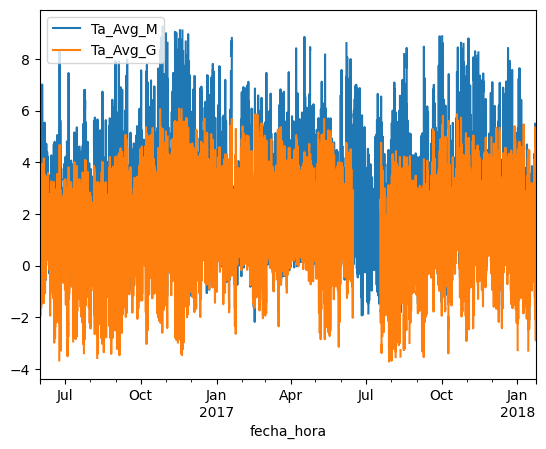

In [28]:
AWS_G_M.plot(x='fecha_hora', y=['Ta_Avg_M', 'Ta_Avg_G'])

## Hacemos una figura de correlación

<Axes: xlabel='Ta_Avg_M', ylabel='Ta_Avg_G'>

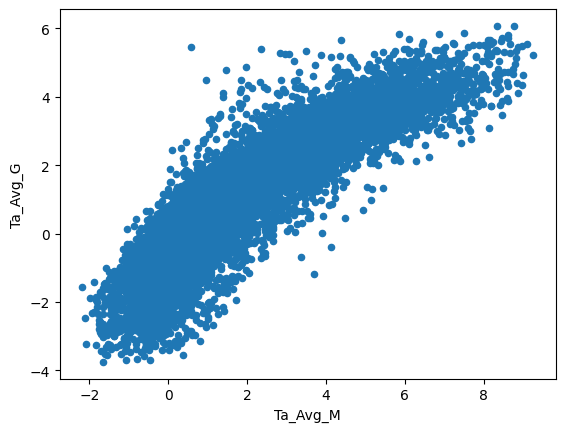

In [29]:
AWS_G_M[['Ta_Avg_M', 'Ta_Avg_G']].plot.scatter(x='Ta_Avg_M', y='Ta_Avg_G')

- `AWS_G_M[['Ta_Avg_M', 'Ta_Avg_G']]` → Selecciona solo las columnas de temperatura promedio de ambas estaciones.
- `x='Ta_Avg_M'` → Temperatura de la estación M en el eje X.
- `y='Ta_Avg_G'` → Temperatura de la estación G en el eje Y

## Analisis de correlación 

In [30]:
AWS_G_M_nodata = AWS_G_M[['Ta_Avg_M', 'Ta_Avg_G']].dropna()
AWS_G_M_nodata

,Ta_Avg_M,Ta_Avg_G
0,1.113636,-0.356606
1,0.589906,-0.803753
2,0.103807,-1.104493
3,0.156244,-1.351831
4,0.214754,-1.227747
...,...,...
14434,1.833746,1.472500
14435,2.589166,2.016000
14436,3.048399,2.846000
14437,3.979526,3.244000


Este código realiza dos operaciones secuenciales en un DataFrame de Pandas:
1. **Selecciona columnas específicas**
2. **Elimina filas con valores faltantes**

In [31]:
## declarando las variables en X y Y
x = AWS_G_M_nodata['Ta_Avg_M']
y = AWS_G_M_nodata['Ta_Avg_G']

In [32]:
# Calcular regresión lineal
pendiente, intercepto, r_value, p_value, std_err = linregress(x, y)

In [33]:
## imprimir los indicadores 
print(pendiente, intercepto, r_value, p_value, std_err)

0.7699288543591766 -0.35928856658196673 0.890810953035783 0.0 0.00340694539086871


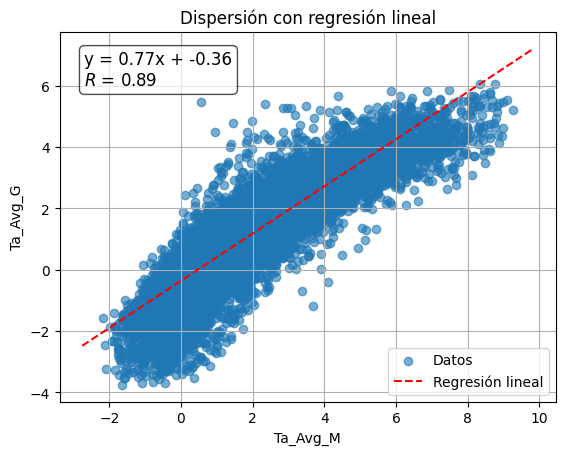

In [34]:
# Crear el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.6, label='Datos')

# Dibujar línea de regresión
x_vals = np.array(ax.get_xlim())
y_vals = intercepto + pendiente * x_vals
ax.plot(x_vals, y_vals, color='red', linestyle='--', label='Regresión lineal')

# Añadir ecuación y R al gráfico
texto_ecuacion = f'y = {pendiente:.2f}x + {intercepto:.2f}\n$R$ = {r_value:.2f}'
ax.text(0.05, 0.95, texto_ecuacion, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Etiquetas y estilo
ax.set_xlabel('Ta_Avg_M')
ax.set_ylabel('Ta_Avg_G')
ax.set_title('Dispersión con regresión lineal')
ax.legend()
plt.grid(True)
plt.show()

## Completamos los datos de temperatura basado en la ecuación lineal

In [35]:
# Crear una copia para no modificar el original
T2_G_M_completo = AWS_G_M.copy()

# Identificar filas con Ta_Avg_x faltante pero con Ta_Avg_y presente
filtro = T2_G_M_completo['Ta_Avg_G'].isna() & T2_G_M_completo['Ta_Avg_M'].notna()

# Rellenar los valores faltantes en Ta_Avg_x usando la ecuación de regresión
T2_G_M_completo.loc[filtro, 'Ta_Avg_G'] = (
    pendiente * T2_G_M_completo.loc[filtro, 'Ta_Avg_M'] + intercepto
)

In [36]:
T2_G_M_completo

,fecha_hora,Ta_Avg_G,Ta_Avg_M
0,2016-06-01 00:00:00,-0.356606,1.113636
1,2016-06-01 01:00:00,-0.803753,0.589906
2,2016-06-01 02:00:00,-1.104493,0.103807
3,2016-06-01 03:00:00,-1.351831,0.156244
4,2016-06-01 04:00:00,-1.227747,0.214754
...,...,...,...
14435,2018-01-23 11:00:00,2.016000,2.589166
14436,2018-01-23 12:00:00,2.846000,3.048399
14437,2018-01-23 13:00:00,3.244000,3.979526
14438,2018-01-23 14:00:00,3.472000,4.468320


<Axes: xlabel='fecha_hora'>

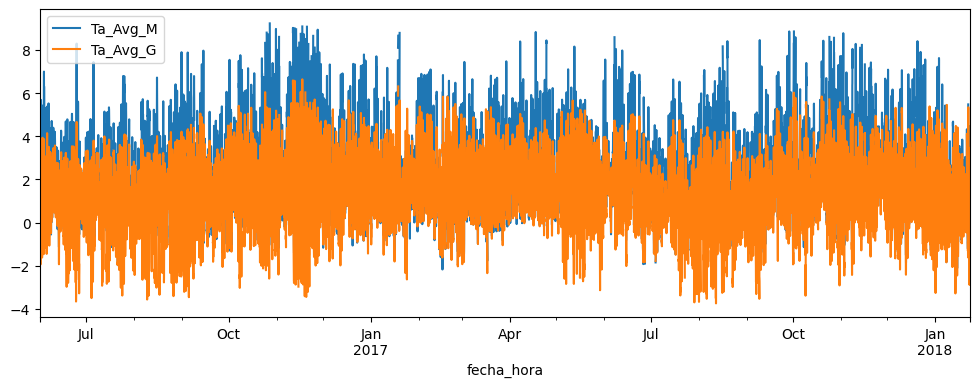

In [37]:
## Verificamos que los datos esten completados
T2_G_M_completo.plot(x='fecha_hora', y=['Ta_Avg_M', 'Ta_Avg_G'], figsize=(12, 4))

### Guardar csv

In [38]:
T2_G_M_completo.to_csv('../data/AWSs_data_arteson.csv', index=False)

## Análisis horario, mensual, estacional y anual

Creamos nuevas columnas con `año`, `mes` y `hora` para agrupar.

In [39]:
T2_G_M_completo['año'] = T2_G_M_completo['fecha_hora'].dt.year
T2_G_M_completo['mes'] = T2_G_M_completo['fecha_hora'].dt.month
T2_G_M_completo['hora'] = T2_G_M_completo['fecha_hora'].dt.hour
T2_G_M_completo

,fecha_hora,Ta_Avg_G,Ta_Avg_M,año,mes,hora
0,2016-06-01 00:00:00,-0.356606,1.113636,2016,6,0
1,2016-06-01 01:00:00,-0.803753,0.589906,2016,6,1
2,2016-06-01 02:00:00,-1.104493,0.103807,2016,6,2
3,2016-06-01 03:00:00,-1.351831,0.156244,2016,6,3
4,2016-06-01 04:00:00,-1.227747,0.214754,2016,6,4
...,...,...,...,...,...,...
14435,2018-01-23 11:00:00,2.016000,2.589166,2018,1,11
14436,2018-01-23 12:00:00,2.846000,3.048399,2018,1,12
14437,2018-01-23 13:00:00,3.244000,3.979526,2018,1,13
14438,2018-01-23 14:00:00,3.472000,4.468320,2018,1,14


### Creamos una función para crear una columna con las 4 estaciones

In [40]:
# Clasificación de estaciones del año
def get_estacion(mes):
    if mes in [12, 1, 2]:
        return "Verano"
    elif mes in [3, 4, 5]:
        return "Otoño"
    elif mes in [6, 7, 8]:
        return "Invierno"
    else:
        return "Primavera"


In [41]:
## Aplicamos la función
T2_G_M_completo["estacion_climatica"] = T2_G_M_completo["mes"].apply(get_estacion)
T2_G_M_completo

,fecha_hora,Ta_Avg_G,Ta_Avg_M,año,mes,hora,estacion_climatica
0,2016-06-01 00:00:00,-0.356606,1.113636,2016,6,0,Invierno
1,2016-06-01 01:00:00,-0.803753,0.589906,2016,6,1,Invierno
2,2016-06-01 02:00:00,-1.104493,0.103807,2016,6,2,Invierno
3,2016-06-01 03:00:00,-1.351831,0.156244,2016,6,3,Invierno
4,2016-06-01 04:00:00,-1.227747,0.214754,2016,6,4,Invierno
...,...,...,...,...,...,...,...
14435,2018-01-23 11:00:00,2.016000,2.589166,2018,1,11,Verano
14436,2018-01-23 12:00:00,2.846000,3.048399,2018,1,12,Verano
14437,2018-01-23 13:00:00,3.244000,3.979526,2018,1,13,Verano
14438,2018-01-23 14:00:00,3.472000,4.468320,2018,1,14,Verano


In [42]:
# Nombres y colores
meses_nombre = ["Ene", "Feb", "Mar", "Abr", "May", "Jun",
                "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
orden_estaciones = ["Verano", "Otoño", "Invierno", "Primavera"]
colores = {"Ta_Avg_G": "tab:blue", "Ta_Avg_M": "tab:orange"}

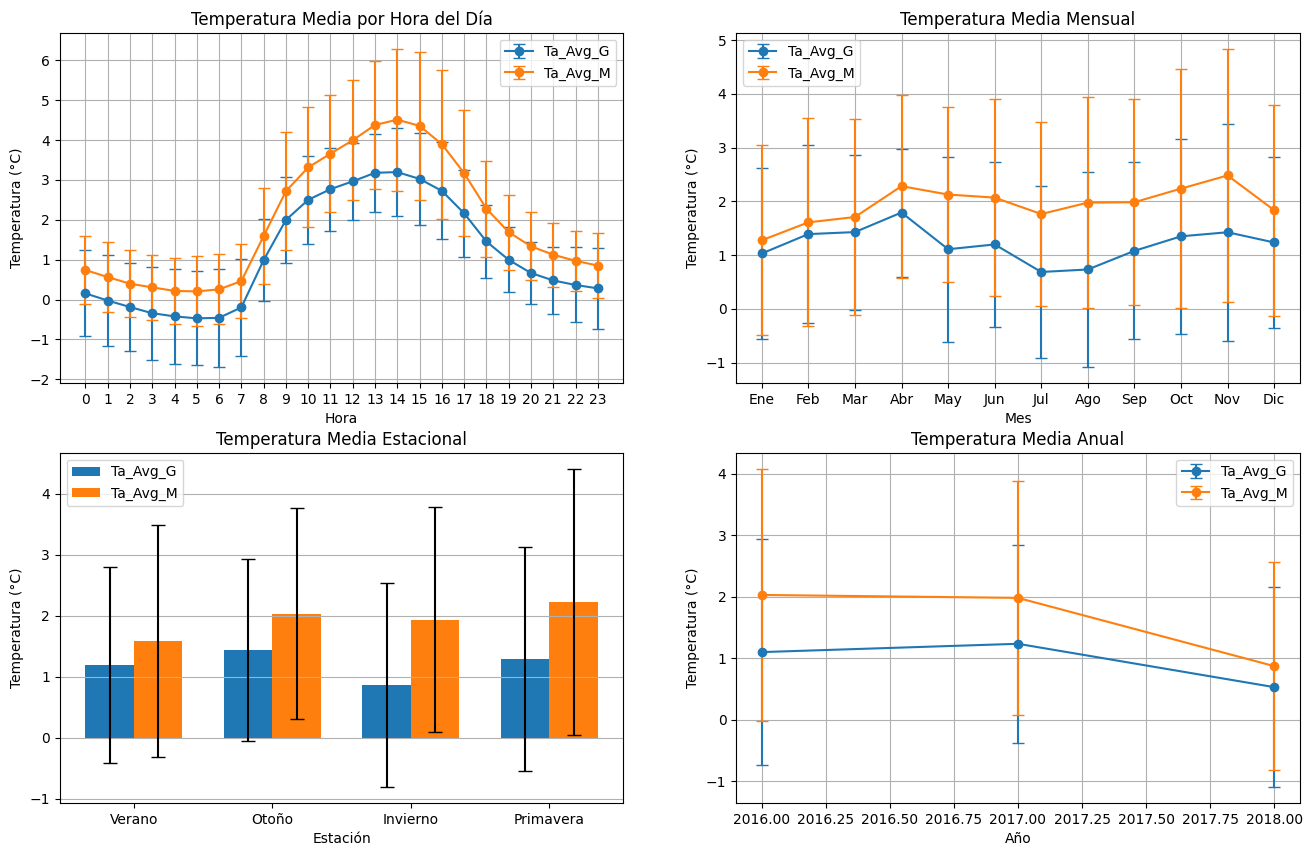

In [43]:
# Crear figura 2x2
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()  # Acceso directo por índice

# 1. Análisis horario (axs[0])
for var in ["Ta_Avg_G", "Ta_Avg_M"]:
    horario = T2_G_M_completo.groupby("hora")[var].agg(["mean", "std"]).reset_index()
    axs[0].errorbar(horario["hora"], horario["mean"], yerr=horario["std"],
                    fmt='-o', capsize=4, label=var, color=colores[var])
axs[0].set_title("Temperatura Media por Hora del Día")
axs[0].set_xticks(range(0, 24))
axs[0].set_xlabel("Hora")
axs[0].set_ylabel("Temperatura (°C)")
axs[0].legend()
axs[0].grid(True)

# 2. Análisis mensual (axs[1])
for var in ["Ta_Avg_G", "Ta_Avg_M"]:
    mensual = T2_G_M_completo.groupby("mes")[var].agg(["mean", "std"]).reset_index()
    axs[1].errorbar(mensual["mes"], mensual["mean"], yerr=mensual["std"],
                    fmt='-o', capsize=4, label=var, color=colores[var])
axs[1].set_title("Temperatura Media Mensual")
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(meses_nombre)
axs[1].set_xlabel("Mes")
axs[1].set_ylabel("Temperatura (°C)")
axs[1].legend()
axs[1].grid(True)

# 3. Análisis estacional (axs[2])
for i, var in enumerate(["Ta_Avg_G", "Ta_Avg_M"]):
    estacional = T2_G_M_completo.groupby("estacion_climatica")[var].agg(["mean", "std"]).reset_index()
    estacional["estacion_climatica"] = pd.Categorical(estacional["estacion_climatica"],
                                                       categories=orden_estaciones, ordered=True)
    estacional = estacional.sort_values("estacion_climatica")

    x = [p + i * 0.35 for p in range(len(orden_estaciones))]

    axs[2].bar(x, estacional["mean"], width=0.35, yerr=estacional["std"],
               capsize=5, label=var, color=colores[var])
axs[2].set_title("Temperatura Media Estacional")
axs[2].set_xticks([p + 0.35 / 2 for p in range(len(orden_estaciones))])
axs[2].set_xticklabels(orden_estaciones)
axs[2].set_xlabel("Estación")
axs[2].set_ylabel("Temperatura (°C)")
axs[2].legend()
axs[2].grid(axis="y")

# 4. Análisis anual (axs[3])
for var in ["Ta_Avg_G", "Ta_Avg_M"]:
    anual = T2_G_M_completo.groupby("año")[var].agg(["mean", "std"]).reset_index()
    axs[3].errorbar(anual["año"], anual["mean"], yerr=anual["std"],
                    fmt='-o', capsize=4, label=var, color=colores[var])
axs[3].set_title("Temperatura Media Anual")
axs[3].set_xlabel("Año")
axs[3].set_ylabel("Temperatura (°C)")
axs[3].legend()
axs[3].grid(True)

## Guardamos el analisis
fig.savefig('../fig/analis_temperatura.png', dpi=300, facecolor='w', bbox_inches='tight', pad_inches=0.1)